In [33]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

In [34]:
minji_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image1.jpg'
winter_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/winter.jpg'
cat_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat.jpg'

minji_img = cv2.imread(minji_img_path)
winter_img = cv2.imread(winter_img_path)
cat_img = cv2.imread(cat_img_path)

(1066, 730, 3)


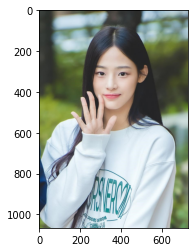

In [35]:
print(minji_img.shape)
plt.imshow(cv2.cvtColor(minji_img,cv2.COLOR_BGR2RGB))
plt.show()

(827, 620, 3)


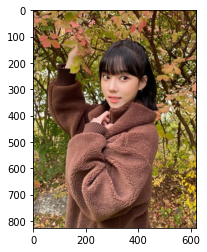

In [36]:
print(winter_img.shape)
plt.imshow(cv2.cvtColor(winter_img,cv2.COLOR_BGR2RGB))
plt.show()

(827, 620, 3)


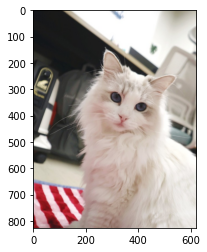

In [37]:
print(cat_img.shape)
plt.imshow(cv2.cvtColor(cat_img,cv2.COLOR_BGR2RGB))
plt.show()

DeepLabV3모델 저장

In [38]:
#DeepLab모델
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir,'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 URL
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 
urllib.request.urlretrieve(model_url, model_file) 
# urllib 패키지 내에 있는 request 모듈

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x781a5d6d8910>)

In [39]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [40]:
segvalues_m, output_m = model.segmentAsPascalvoc(minji_img_path)
segvalues_w, output_w = model.segmentAsPascalvoc(winter_img_path)
segvalues_c, output_c = model.segmentAsPascalvoc(cat_img_path)
# 학습된 모델에 각 이미지를 넣어 분할을 하고, 분할 출력 배열을 output에 넣음

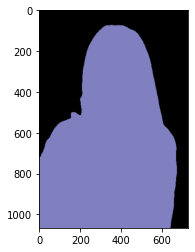

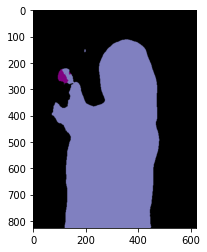

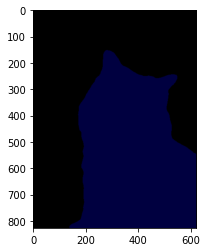

In [41]:
plt.imshow(output_m)
plt.show()

plt.imshow(output_w)
plt.show()

plt.imshow(output_c)
plt.show()

In [42]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [43]:
for class_id in segvalues_m['class_ids']:
    print(LABEL_NAMES[class_id])
print('\n')
for class_id in segvalues_w['class_ids']:
    print(LABEL_NAMES[class_id])
print('\n')    
for class_id in segvalues_c['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


background
bottle
person


background
cat


In [44]:
# 256개의 색상으로 구성된 colormap 생성
colormap = np.zeros((256,3), dtype = int) # 256 x 3 크기의 배열을 0으로 초기화
ind = np.arange(256, dtype = int) # 0~255까지의 정수 배열 생성

for shift in reversed(range(8)): 
    for channel in range(3): # RGB채널 처리
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>=3
    
colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

각 루프 반복에서 다음을 수행합니다:
- ind 값을 channel만큼 오른쪽으로 이동 (ind >> channel)
- 1로 AND 연산을 통해 해당 비트 값을 추출 (& 1)
- 해당 비트를 shift만큼 왼쪽으로 이동 (<< shift)
- 기존의 colormap 값과 OR 연산을 통해 결합 (|=)
- ind 값을 3만큼 오른쪽으로 이동 (ind >>= 3)

In [45]:
colormap[15] # 사람colormap

array([192, 128, 128])

In [46]:
colormap[8] # 고양이 colormap

array([64,  0,  0])

In [47]:
# colormap의 RGB순->output의 배열BGR순
person_seg_color = (128,128,192) # 사람 영역 색
cat_seg_color = (0,0,64) # 고양이 영역 색

(1066, 730)


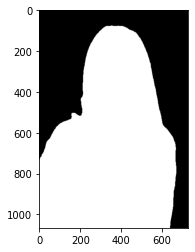

(827, 620)


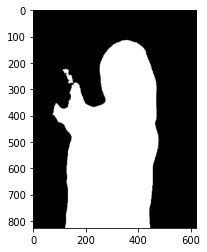

(827, 620)


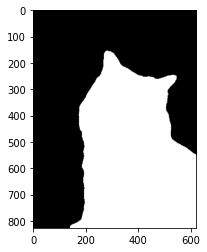

In [48]:
seg_map_m = np.all(output_m == person_seg_color, axis = -1)
seg_map_w = np.all(output_w == person_seg_color, axis = -1)
seg_map_c = np.all(output_c == cat_seg_color, axis = -1)

print(seg_map_m.shape)
plt.imshow(seg_map_m, cmap = 'gray')
plt.show()

print(seg_map_w.shape)
plt.imshow(seg_map_w, cmap = 'gray')
plt.show()

print(seg_map_c.shape)
plt.imshow(seg_map_c, cmap = 'gray')
plt.show()

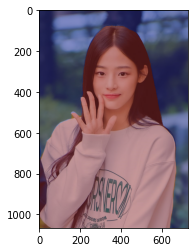

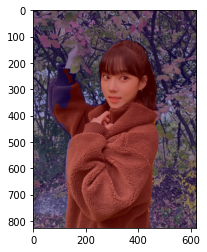

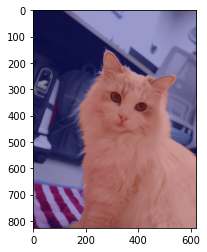

In [49]:
#원본이미지
img_show_m = minji_img.copy()
img_show_w = winter_img.copy()
img_show_c = cat_img.copy()

#객체별 분리된? 마스크
img_mask_m = seg_map_m.astype(np.uint8)*255
img_mask_w = seg_map_w.astype(np.uint8)*255
img_mask_c = seg_map_c.astype(np.uint8)*255

#255와 0을 적당한 색상으로 바꾼다
color_mask_m = cv2.applyColorMap(img_mask_m, cv2.COLORMAP_JET)
color_mask_w = cv2.applyColorMap(img_mask_w, cv2.COLORMAP_JET)
color_mask_c = cv2.applyColorMap(img_mask_c, cv2.COLORMAP_JET)

#원본이미지+마스크
img_show_m = cv2.addWeighted(img_show_m, 0.6, color_mask_m, 0.4, 0.0)
img_show_w = cv2.addWeighted(img_show_w, 0.6, color_mask_w, 0.4, 0.0)
img_show_c = cv2.addWeighted(img_show_c, 0.6, color_mask_c, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show_m, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img_show_w, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(img_show_c, cv2.COLOR_BGR2RGB))
plt.show()

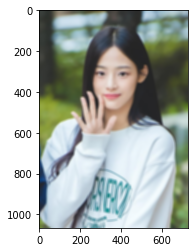

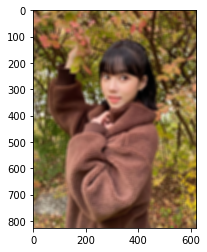

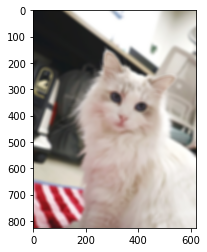

In [51]:
#블러 처리
minji_img_blur = cv2.blur(minji_img,(13,13))
plt.imshow(cv2.cvtColor(minji_img_blur, cv2.COLOR_BGR2RGB))
plt.show()

winter_img_blur = cv2.blur(winter_img,(13,13))
plt.imshow(cv2.cvtColor(winter_img_blur, cv2.COLOR_BGR2RGB))
plt.show()

cat_img_blur = cv2.blur(cat_img,(13,13))
plt.imshow(cv2.cvtColor(cat_img_blur, cv2.COLOR_BGR2RGB))
plt.show()

세그멘테이션 마스크를 이용해서 배경만 블러처리된 추출

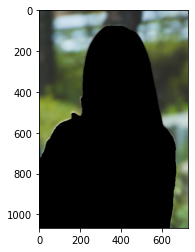

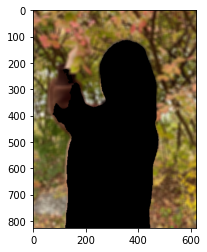

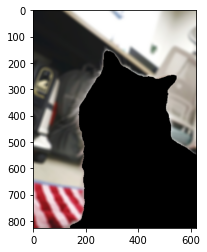

In [53]:
m_img_mask_color = cv2.cvtColor(img_mask_m, cv2.COLOR_GRAY2BGR)
w_img_mask_color = cv2.cvtColor(img_mask_w, cv2.COLOR_GRAY2BGR)
c_img_mask_color = cv2.cvtColor(img_mask_c, cv2.COLOR_GRAY2BGR)

m_img_bg_mask = cv2.bitwise_not(m_img_mask_color)
w_img_bg_mask = cv2.bitwise_not(w_img_mask_color)
c_img_bg_mask = cv2.bitwise_not(c_img_mask_color)

m_img_bg_blur = cv2.bitwise_and(minji_img_blur, m_img_bg_mask) #배경만 블러처리
plt.imshow(cv2.cvtColor(m_img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

w_img_bg_blur = cv2.bitwise_and(winter_img_blur, w_img_bg_mask) #배경만 블러처리
plt.imshow(cv2.cvtColor(w_img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

c_img_bg_blur = cv2.bitwise_and(cat_img_blur, c_img_bg_mask) #배경만 블러처리
plt.imshow(cv2.cvtColor(c_img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

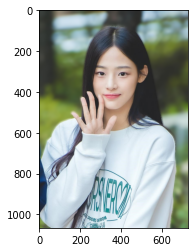

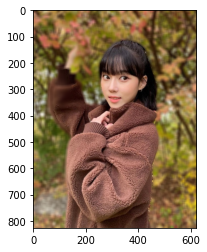

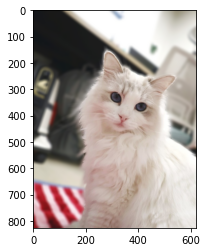

In [54]:
#합치기
m_img_concat = np.where(m_img_mask_color == 255, minji_img, m_img_bg_blur)
plt.imshow(cv2.cvtColor(m_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

w_img_concat = np.where(w_img_mask_color == 255, winter_img, w_img_bg_blur)
plt.imshow(cv2.cvtColor(w_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

c_img_concat = np.where(c_img_mask_color == 255, cat_img, c_img_bg_blur)
plt.imshow(cv2.cvtColor(c_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 크로마키 합성

(2080, 1170, 3)


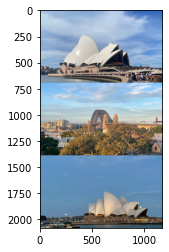

In [58]:
# 배경이미지
sydney_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/sydney.jpg'
sydney = cv2.imread(sydney_path)

print(sydney.shape)
plt.imshow(cv2.cvtColor(sydney, cv2.COLOR_BGR2RGB))
plt.show()

(2080, 1170, 3)


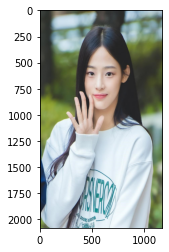

In [60]:
minji_img = cv2.imread(minji_img_path)

height, width, ch = sydney.shape # 배경사이즈에 맞게 조정
minji_img = cv2.resize(minji_img, (width,height))

m_img_mask_color2 = m_img_mask_color.copy() # 색상마스크 복사
m_img_mask_color2 = cv2.resize(m_img_mask_color2, (width, height)) # 마스크 크기 조절

plt.imshow(cv2.cvtColor(minji_img, cv2.COLOR_BGR2RGB))
print(minji_img.shape)
plt.show()

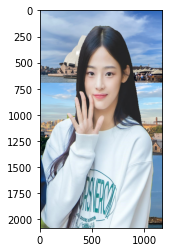

In [61]:
#합성
minji_img_concat = np.where(m_img_mask_color2 == 255, minji_img, sydney)
plt.imshow(cv2.cvtColor(minji_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(1020, 680, 3)


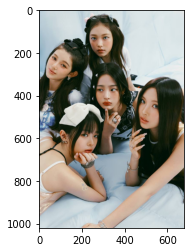

In [64]:
newjeans_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/newjeans.jpg'
newjeans = cv2.imread(newjeans_path)

print(newjeans.shape)
plt.imshow(cv2.cvtColor(newjeans,cv2.COLOR_BGR2RGB))
plt.show()

In [65]:
segvalues, output = model.segmentAsPascalvoc(newjeans_path)

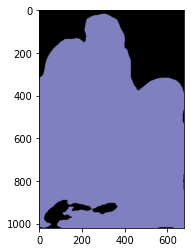

In [66]:
plt.imshow(output)
plt.show()

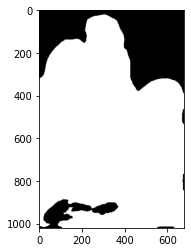

In [67]:
seg_color = (128,128,192)

seg_map = np.all(output==seg_color, axis = -1)
plt.imshow(seg_map, cmap='gray')
plt.show()

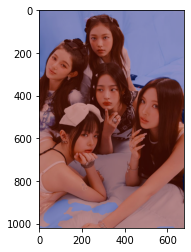

In [71]:
newjeans_img = newjeans.copy()

img_mask = seg_map.astype(np.uint8)*255
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

newjeans_img = cv2.addWeighted(newjeans_img, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(newjeans_img,cv2.COLOR_BGR2RGB))
plt.show()

### 문제점
- 경계선에서 배경과 약간 겹치게 되는 경우 정확하게 분리되지 않음을 알 수 있다.
- 인물과 배경의 경계선에도 블러 효과가 적용된다.
- 객체가 모여있을 경우 섬세하게 분리되지 않음을 확인할 수 있다.

#### 해결방안
- 사진의 채도, 밝기를 낮추거나 높여서 코드를 돌려봐야할 것 같다.

(1020, 680, 3)


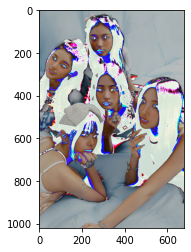

True

In [77]:
newjeans_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/newjeans.jpg'
newjeans = cv2.imread(newjeans_path)

brightness_decrease = 50 #밝기 감소량 0~100

dark_newjeans = np.clip(newjeans - brightness_decrease, 0, 255)

print(dark_newjeans.shape)
plt.imshow(cv2.cvtColor(dark_newjeans,cv2.COLOR_BGR2RGB))
plt.show()

dark_image_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/temp_darkened_newjeans.jpg'
cv2.imwrite(dark_image_path,dark_newjeans)

In [78]:
segvalues, output = model.segmentAsPascalvoc(dark_image_path)

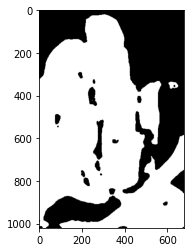

In [79]:
seg_color = (128,128,192)

seg_map = np.all(output==seg_color, axis = -1)
plt.imshow(seg_map, cmap='gray')
plt.show()

회고
- 배운점 : 이미지에 인물 모드 효과를 적용하는 과정을 알 수 있었다.
    - 이미지에서 인물을 인식
    - 인물에 해당하는 영역만 마스킹
    - 원본 이미지에 블러 효과를 적용한 새로운 이미지 생성
    - 마스킹된 영역은 원본이미지로 그 외의 영역은 블러 이미지를 입힌다.
- 아쉬운 점 : 20개의 대상을 인식할 수 있는 모델을 사용해서 실습을 진행했는데 더 다양한 대상을 인식할 수 있는 모델을 사용한다면 더 정확하게 분리할 수 있을 것 같다. 다른 모델을 더 찾아봐야겠다.
- 어려웠던 점 : 문제점을 해결하는 방안을 명확하게 찾아내지 못했다.